# CalTech 101

Now that we have learned how to do Transfer Learning, let's try to use it on larger Datasets. We will study the [CalTech101] dataset (http://www.vision.caltech.edu/Image_Datasets/Caltech101/) which contains 40 to 800 images from 101 categories. 

* Import the classic librairies 
  * Tensorflow 2.0
  * Numpy 
  * Matplotlib

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

* Using [`tf.keras.utils.get_file()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file), download and extract the Caltech101 dataset from this link:   
https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Deep+learning+Images+processing/Transfer+Learning/101_ObjectCategories.zip

In [ ]:
data_root_orig = tf.keras.utils.get_file(origin='https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Deep+learning+Images+processing/Transfer+Learning/101_ObjectCategories.zip',
                                         fname='/content/101_ObjectCategories.tar.gz', 
                                         extract=True,
                                         cache_subdir="/content")

* Using [pathlib](https://docs.python.org/3/library/pathlib.html), create a path to the `101_ObjectCategories` directory.

In [ ]:
import pathlib

data_root = pathlib.Path("/content/101_objectcategories/101_ObjectCategories")
print(data_root)

/content/101_objectcategories/101_ObjectCategories


* Convert each of the image paths to a `string`.

In [ ]:
all_image_paths = [str(path) for path in data_root.glob("*/*")]

* Using [tf.io.read_file](https://www.tensorflow.org/api_docs/python/tf/io/read_file), convert each path to bytes

In [ ]:
# Convert all string path into bytes
all_image_bytes = [tf.io.read_file(path) for path in all_image_paths]

* Finally convert the bytes to Tensors using [tf.io.decode_jpeg](https://www.tensorflow.org/api_docs/python/tf/io/decode_jpeg)

In [ ]:
# Convert all bytes into a tensor
all_image_bytes = [tf.io.decode_jpeg(image_bytes) for image_bytes in all_image_bytes]

* Create a way to view random images from your dataset.   
__WARNING__: Some images are in black & white and some are in color.

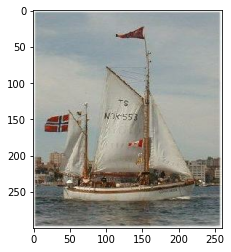

In [ ]:
## WARNING: Some images are in black & white and some are in color.
## We must therefore put them in shape (height, width) and not (height, width, channel).
plt.imshow(all_image_bytes[np.random.randint(len(all_image_bytes))])
plt.show()

* We will now insert our data into a [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset). So insert your paths into an `tf.data.Dataset`.

In [ ]:
ds_paths = tf.data.Dataset.from_tensor_slices(all_image_paths)

* Create a `load_and_preprocess_images` function that will do the same preprocessing as above.

In [ ]:
# Preprocess the images 
def load_and_preprocess_images(image_path):
    return tf.image.resize(tf.image.decode_jpeg(tf.io.read_file(image_path), channels=3), [224, 224]) / 255.0

* Apply your function to your dataset using [`.map()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map)

In [ ]:
ds_images = ds_paths.map(load_and_preprocess_images)

* Create a list containing all the folder names (e.g. your _targets_)

In [ ]:
# Get image labels 
labels = [path.name for path in data_root.iterdir() if path.is_dir()]
labels

['lobster',
 'menorah',
 'gramophone',
 'stapler',
 'umbrella',
 'flamingo',
 'car_side',
 'anchor',
 'sea_horse',
 'stop_sign',
 'gerenuk',
 'yin_yang',
 'crocodile_head',
 'butterfly',
 'hedgehog',
 'pyramid',
 'scissors',
 'tick',
 'stegosaurus',
 'soccer_ball',
 'dollar_bill',
 'emu',
 'lamp',
 'water_lilly',
 'ibis',
 'schooner',
 'ketch',
 'windsor_chair',
 'beaver',
 'Faces',
 'brain',
 'accordion',
 'cougar_body',
 'dalmatian',
 'inline_skate',
 'Leopards',
 'cellphone',
 'watch',
 'cup',
 'helicopter',
 'grand_piano',
 'wild_cat',
 'panda',
 'ant',
 'llama',
 'kangaroo',
 'platypus',
 'elephant',
 'euphonium',
 'mayfly',
 'flamingo_head',
 'ewer',
 'pizza',
 'headphone',
 'garfield',
 'mandolin',
 'BACKGROUND_Google',
 'cannon',
 'brontosaurus',
 'crayfish',
 'ferry',
 'nautilus',
 'pigeon',
 'joshua_tree',
 'okapi',
 'crocodile',
 'rooster',
 'saxophone',
 'ceiling_fan',
 'Faces_easy',
 'wrench',
 'chandelier',
 'pagoda',
 'airplanes',
 'metronome',
 'revolver',
 'strawberry'

* Now create a dictionary that will have the following structure: 

{*label*: *index*} ---> ex: {*buddha*: 10}

In [ ]:
labels_index = {label: i for i, label in enumerate(labels)}
labels_index

{'BACKGROUND_Google': 56,
 'Faces': 29,
 'Faces_easy': 69,
 'Leopards': 35,
 'Motorbikes': 98,
 'accordion': 31,
 'airplanes': 73,
 'anchor': 7,
 'ant': 43,
 'barrel': 83,
 'bass': 99,
 'beaver': 28,
 'binocular': 90,
 'bonsai': 86,
 'brain': 30,
 'brontosaurus': 58,
 'buddha': 94,
 'butterfly': 13,
 'camera': 81,
 'cannon': 57,
 'car_side': 6,
 'ceiling_fan': 68,
 'cellphone': 36,
 'chair': 80,
 'chandelier': 71,
 'cougar_body': 32,
 'cougar_face': 100,
 'crab': 82,
 'crayfish': 59,
 'crocodile': 65,
 'crocodile_head': 12,
 'cup': 38,
 'dalmatian': 33,
 'dollar_bill': 20,
 'dolphin': 95,
 'dragonfly': 87,
 'electric_guitar': 92,
 'elephant': 47,
 'emu': 21,
 'euphonium': 48,
 'ewer': 51,
 'ferry': 60,
 'flamingo': 5,
 'flamingo_head': 50,
 'garfield': 54,
 'gerenuk': 10,
 'gramophone': 2,
 'grand_piano': 40,
 'hawksbill': 78,
 'headphone': 53,
 'hedgehog': 14,
 'helicopter': 39,
 'ibis': 24,
 'inline_skate': 34,
 'joshua_tree': 63,
 'kangaroo': 45,
 'ketch': 26,
 'lamp': 22,
 'laptop'

* Now create a list containing all label numbers 

In [ ]:
# Create labels for each image
all_image_labels = [labels_index[path.parent.name] for path in data_root.glob("*/*")]
all_image_labels[:5]

[0, 0, 0, 0, 0]

* Finally insert this list into a `tf.data.Dataset`.

In [ ]:
# Create a tf.data.Dataset of labels 
labels_ds = tf.data.Dataset.from_tensor_slices(all_image_labels)
labels_ds

<TensorSliceDataset shapes: (), types: tf.int32>

* Now create a `full_ds` which will contain your train dataset and your labels 

In [ ]:
# Create a full dataset
full_ds = tf.data.Dataset.zip((ds_images, labels_ds)).shuffle(len(all_image_paths), reshuffle_each_iteration=False)

In [ ]:
next(iter(full_ds))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.2376768 , 0.10826503, 0.08081405],
         [0.225415  , 0.09600324, 0.06613629],
         [0.20932263, 0.07991087, 0.04461676],
         ...,
         [0.32507086, 0.16363905, 0.09272708],
         [0.39949617, 0.23287469, 0.15936786],
         [0.43601212, 0.26738468, 0.19287485]],
 
        [[0.22850858, 0.09909683, 0.07164585],
         [0.21790966, 0.0884979 , 0.05863095],
         [0.20676693, 0.07735515, 0.04206104],
         ...,
         [0.34810254, 0.17950991, 0.10404629],
         [0.40993208, 0.23731302, 0.15881163],
         [0.44220957, 0.26959056, 0.19108914]],
 
        [[0.2134893 , 0.08407754, 0.05662655],
         [0.21138048, 0.08196872, 0.05210178],
         [0.20582983, 0.07641806, 0.04112395],
         ...,
         [0.36879638, 0.18790297, 0.10463139],
         [0.41526836, 0.23086789, 0.14416406],
         [0.44431043, 0.25786084, 0.17218158]],
 
        ...,
 
        [[0.40784314, 0.11372549

* Create a `data_aug` function that will take care of your *Data Increase* 

In [ ]:
def data_aug (image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_contrast(image, 0, 3.4)
    image = tf.image.random_crop(image, [224,224, 3])
    return image, label

* We're now going to split our `full_ds` into a `train_set` and a `test_set`. You will choose an 80/20 split. To help you, you can use the methods : [`take`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) and [`skip`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#skip)

In [ ]:
train_size = int(len(all_image_labels) * 0.8)
train_set = full_ds.take(train_size)
test_set = full_ds.skip(train_size)

* Create a training dataset repeated 5 times on which you will apply your function 

In [ ]:
augmented = train_set.repeat(5).map(data_aug)

* Now, apply a [`.shuffle()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle) then a [`.batch()`](https://www.tensorfloworg/api_docs/python/tf/data/Dataset#batch) of 32 to your datasets 

In [ ]:
# Shuffle the datasets & create batchs 
augmented = augmented.shuffle(len(train_set)).batch(32)
test_set = test_set.shuffle(len(test_set)).batch(32)

* View the first image of the first 10 batches. Also display his label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


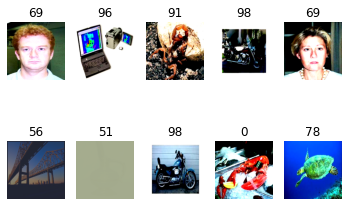

In [ ]:
# Visualize some data
fig, axes = plt.subplots(2, 5)
for ax, (example_x, example_y) in zip(axes.flat, augmented.take(10)):
    ax.imshow(example_x[0].numpy())
    ax.axis('off')
    ax.set_title(example_y[0].numpy())

* Import a pre-trained template into Github using [`tf.keras.applications`](https://www.tensorflow.org/api_docs/python/tf/keras/applications). We advise you to use `MobileNetV2`. 

NB: Don't forget to give the right `input_shape`, don't take the last _layer_ and import the weights from `imagenet`.

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), 
                                               include_top=False,
                                               weights="imagenet"
                                               )

* Set the weights of your imported model as non-trainable 

In [ ]:
base_model.trainable = False

* Create now your complete model by adding the last layer adapted to your situation 

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(labels), activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 102)               130662    
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


* Create a _learning rate schedule_ via [`tf.keras.optimizers.schedules`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules)

In [ ]:
# Let's create a learning rate schedule to decrease the learning rate as we train the model. 
initial_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=6000,
    decay_rate=0.90,
    staircase=True)

* Create a compiler via [`compile`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr_schedule),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)

* Train your model and save each epoch in a `history` variable. Also add the `validation_data` argument in which you will insert your `test_set`.

In [ ]:
history = model.fit(augmented, epochs=15, validation_data = test_set)

Epoch 1/15
1144/1144 [==============================] - 180s 85ms/step - loss: 2.8473 - sparse_categorical_accuracy: 0.4285 - val_loss: 0.7283 - val_sparse_categorical_accuracy: 0.8677
Epoch 2/15
1144/1144 [==============================] - 130s 84ms/step - loss: 0.6425 - sparse_categorical_accuracy: 0.8845 - val_loss: 0.4203 - val_sparse_categorical_accuracy: 0.9065
Epoch 3/15
1144/1144 [==============================] - 129s 83ms/step - loss: 0.3904 - sparse_categorical_accuracy: 0.9215 - val_loss: 0.3250 - val_sparse_categorical_accuracy: 0.9273
Epoch 4/15
1144/1144 [==============================] - 128s 82ms/step - loss: 0.3031 - sparse_categorical_accuracy: 0.9380 - val_loss: 0.2850 - val_sparse_categorical_accuracy: 0.9240
Epoch 5/15
1144/1144 [==============================] - 128s 83ms/step - loss: 0.2574 - sparse_categorical_accuracy: 0.9473 - val_loss: 0.2629 - val_sparse_categorical_accuracy: 0.9278
Epoch 6/15
1144/1144 [==============================] - 128s 82ms/step - lo

* Visualize your `accuracy` on your `train` and on your `test` 

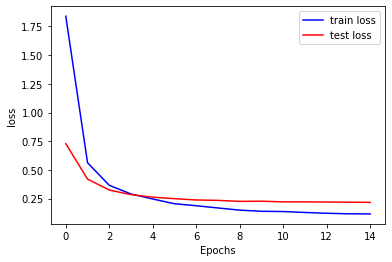

In [ ]:
plt.plot(history.history["loss"], color="b", label="train loss")
plt.plot(history.history["val_loss"], color="r", label="test loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend(loc="upper right")
plt.show()

* Do the same for your `loss`

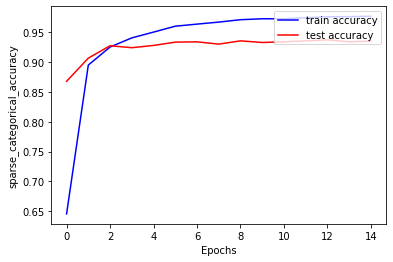

In [ ]:
plt.plot(history.history["sparse_categorical_accuracy"], color="b", label="train accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], color="r", label="test accuracy")
plt.ylabel("sparse_categorical_accuracy")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.show()

* Count the number of _layers_ of your pre-trained model

In [ ]:
len(base_model.layers)

154

* Unblock about 30 layers in your model

In [ ]:
base_model.trainable = False
for layer in base_model.layers[-30:]:
    layer.trainable = True

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 102)               130662    
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


* Recreate a compiler 

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

* Train your model again with _fine tuning_. 

In [ ]:
history = model.fit(augmented, validation_data=test_set, epochs=15)

Epoch 1/15
1144/1144 [==============================] - 131s 83ms/step - loss: 0.2196 - sparse_categorical_accuracy: 0.9468 - val_loss: 0.2323 - val_sparse_categorical_accuracy: 0.9349
Epoch 2/15
1144/1144 [==============================] - 127s 82ms/step - loss: 0.1683 - sparse_categorical_accuracy: 0.9643 - val_loss: 0.2270 - val_sparse_categorical_accuracy: 0.9355
Epoch 3/15
1144/1144 [==============================] - 127s 83ms/step - loss: 0.1589 - sparse_categorical_accuracy: 0.9676 - val_loss: 0.2237 - val_sparse_categorical_accuracy: 0.9371
Epoch 4/15
1144/1144 [==============================] - 126s 83ms/step - loss: 0.1547 - sparse_categorical_accuracy: 0.9678 - val_loss: 0.2248 - val_sparse_categorical_accuracy: 0.9382
Epoch 5/15
1144/1144 [==============================] - 126s 83ms/step - loss: 0.1397 - sparse_categorical_accuracy: 0.9708 - val_loss: 0.2194 - val_sparse_categorical_accuracy: 0.9410
Epoch 6/15
1144/1144 [==============================] - 126s 83ms/step - lo

* Visualize your `accuracy` on your `train` and on your `test` 

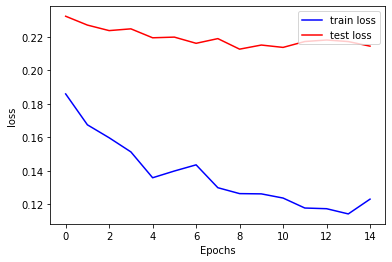

In [ ]:
plt.plot(history.history["loss"], color="b", label="train loss")
plt.plot(history.history["val_loss"], color="r", label="test loss")
plt.legend(loc="upper right")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

* Do the same for your `loss`

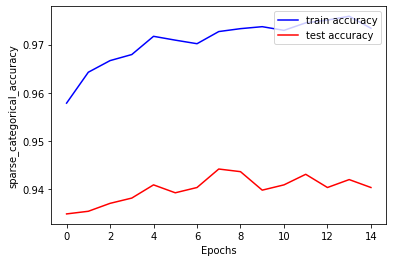

In [ ]:
plt.plot(history.history["sparse_categorical_accuracy"], color="b", label="train accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], color="r", label="test accuracy")
plt.legend(loc="upper right")
plt.ylabel("sparse_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()